In [20]:
# Okay, here we will dive deeper into vitamin A. 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os

In [22]:
query_vc = """ 
SELECT * FROM vegetables
WHERE food_group_id = 1100
AND long_desc LIKE '%cook%'
AND NOT(long_desc LIKE "%beans%"
     OR long_desc LIKE "%peas%"
     OR long_desc LIKE "%lentils%"
     OR long_desc LIKE "%leaves%"
	 OR long_desc LIKE "%greens%"
	 OR long_desc LIKE "%mushroom%"
  	 OR long_desc LIKE "%frozen%"
 	 OR long_desc LIKE "%with salt%");
"""


query_vr = """ 
SELECT * FROM vegetables
WHERE food_group_id = 1100
AND long_desc LIKE '%raw%'
AND NOT(long_desc LIKE "%beans%"
     OR long_desc LIKE "%peas%"
     OR long_desc LIKE "%lentils%"
     OR long_desc LIKE "%leaves%"
	 OR long_desc LIKE "%greens%"
	 OR long_desc LIKE "%mushroom%"
      );
"""

query_fd = """ 
SELECT * FROM fruits_dried
WHERE food_group_id = 900
AND (long_desc LIKE "%dried%"
OR long_desc LIKE "%dehydrated%")
AND NOT (long_desc LIKE "%juice%"
OR long_desc LIKE "%sauce%"
OR long_desc LIKE "%canned%"
OR long_desc LIKE "%frozen%"
OR long_desc LIKE "%peel%"
OR long_desc LIKE "%cooked%"
OR long_desc LIKE "%California%"
OR long_desc LIKE "%Florida%"
OR long_desc LIKE "%navels%"
OR id LIKE "9111"
);
"""

query_fr = """ 
SELECT * FROM fruits_raw
WHERE food_group_id = 900
AND NOT (long_desc LIKE "%juice%"
OR long_desc LIKE "%sauce%"
OR long_desc LIKE "%canned%"
OR long_desc LIKE "%frozen%"
OR long_desc LIKE "%dried%"
OR long_desc LIKE "%dehydrated%"
OR long_desc LIKE "%peel%"
OR long_desc LIKE "%cooked%"
OR long_desc LIKE "%California%"
OR long_desc LIKE "%Florida%"
OR long_desc LIKE "%navels%"
OR id LIKE "9111"
);
"""

database_url = 'sqlite:///C:/Users/Vartotojas/Desktop/programavimas/baigiamasis_darbas/db/db.sqlite3'

engine = create_engine(database_url)

with engine.connect() as conn:
     df_v_fr = pd.read_sql_query(query_fr, engine)
     df_v_vc = pd.read_sql_query(query_vc, engine)
     df_v_fd = pd.read_sql_query(query_fd, engine)
     df_v_vr = pd.read_sql_query(query_vr, engine)


<Figure size 600x300 with 0 Axes>

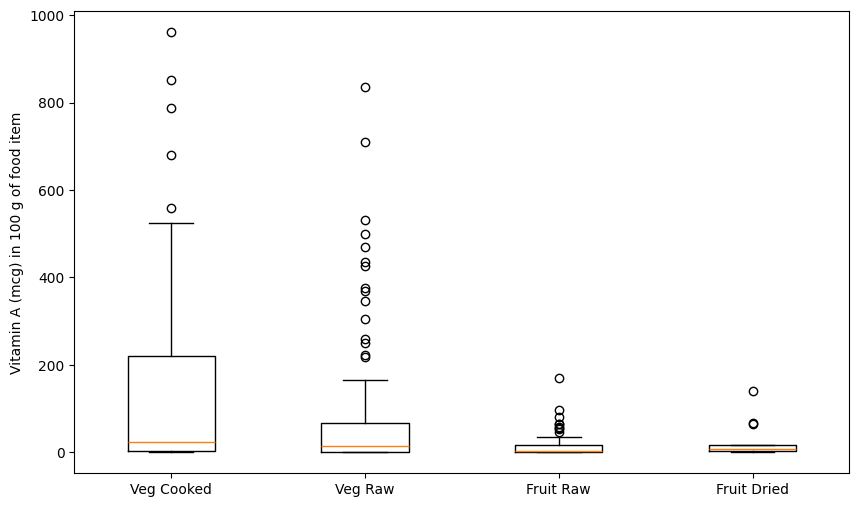

In [23]:
# Let's see how vitamin A content distributes between different food groups:

data = [df_v_vc['vitamin_a_in_mcg'], df_v_vr['vitamin_a_in_mcg'], df_v_fr['vitamin_a_in_mcg'], df_v_fd['vitamin_a_in_mcg']]
 
fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Veg Cooked', 'Veg Raw', 'Fruit Raw', 'Fruit Dried']
fig, ax = plt.subplots(figsize=(10, 6))
plt.ylabel('Vitamin A (mcg) in 100 g of food item')
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()

In [24]:
# Which cooked vegetables are the best? in 100g

top = df_v_vc[['long_desc', 'vitamin_a_in_mcg']].sort_values(by="vitamin_a_in_mcg",ascending=False)
top_30_values = top.head(30)
print(top_30_values)

                                            long_desc  vitamin_a_in_mcg
48  Sweet potato, cooked, baked in skin, flesh, wi...             961.0
12     Carrots, cooked, boiled, drained, without salt             852.0
49         Sweet potato, cooked, boiled, without skin             787.0
24        Kale, cooked, boiled, drained, without salt             681.0
45  Squash, winter, butternut, cooked, baked, with...             558.0
41     Spinach, cooked, boiled, drained, without salt             524.0
33  Pokeberry shoots, (poke), cooked, boiled, drai...             435.0
26  Lambsquarters, cooked, boiled, drained, withou...             391.0
18    Collards, cooked, boiled, drained, without salt             380.0
57       Sweet potato, cooked, candied, home-prepared             349.0
15  Chard, swiss, cooked, boiled, drained, without...             306.0
37     Pumpkin, cooked, boiled, drained, without salt             288.0
56  Squash, winter, all varieties, cooked, baked, ...           

In [25]:
# Which cooked vegetables are the best? in 100kcal

top = df_v_vc[['long_desc', 'vitamin_a_in_mcg_100kcal']].sort_values(by='vitamin_a_in_mcg_100kcal',ascending=False)
top_30_values = top.head(30)
print(top_30_values)

                                            long_desc  \
12     Carrots, cooked, boiled, drained, without salt   
24        Kale, cooked, boiled, drained, without salt   
41     Spinach, cooked, boiled, drained, without salt   
33  Pokeberry shoots, (poke), cooked, boiled, drai...   
11  Cabbage, chinese (pak-choi), cooked, boiled, d...   
15  Chard, swiss, cooked, boiled, drained, without...   
37     Pumpkin, cooked, boiled, drained, without salt   
45  Squash, winter, butternut, cooked, baked, with...   
26  Lambsquarters, cooked, boiled, drained, withou...   
18    Collards, cooked, boiled, drained, without salt   
48  Sweet potato, cooked, baked in skin, flesh, wi...   
49         Sweet potato, cooked, boiled, without skin   
20  Cress, garden, cooked, boiled, drained, withou...   
56  Squash, winter, all varieties, cooked, baked, ...   
23  Jute, potherb, cooked, boiled, drained, withou...   
6                               Broccoli raab, cooked   
46  Squash, winter, hubbard, co

<Figure size 600x300 with 0 Axes>

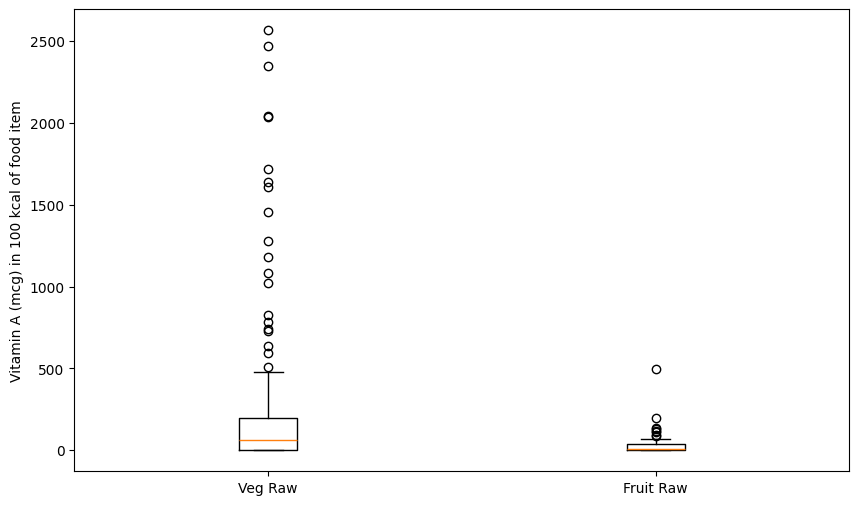

In [26]:
# Let's see how vitamin A content distributes between 100kcal of products:

data = [df_v_vr['vitamin_a_in_mcg_100kcal'], df_v_fr['vitamin_a_in_mcg_100kcal']]
 
fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Veg Raw', 'Fruit Raw']
fig, ax = plt.subplots(figsize=(10, 6))
plt.ylabel('Vitamin A (mcg) in 100 kcal of food item')
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()